<h1><center>Determination of Optimal Locations for Chinese Restaurant in Toronto <br/> 
    Based on K-means Clustering </center></h1>
    
<h2><center> An IBM Data Science Capstone Project </center></h2>

<h3><center>By: James Pan</center></h3>

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Hypothesis](#hypothesis)
* [Methodology & Experiment](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#References)

## Introduction <a name="introduction"></a>

Toronto is one of the most multicultural and multiracial cities in the world. In 2016, 51.5% of the residents of the city proper belonged to a visible minority group, compared with 49.1% in 2011, and 13.6% in 1981 [1-3]. As Canada's largest city and North America's fourth largest, it stands as a symbol of diversity and inclusiveness. 

An annual amount of more than 100000 immigrants is the main contributing factor to this diversity. Of all, Chinese immigrants amounts to the most significant percentage. A major way of making a living for new Chinese immigrants is by opening Chinese restaurants. Yet, as for 2020, there are over 7000 restaurants of various cusines found all over in the Greater Toronto Area. The many restaurants breeds potential competition and may cause new restaurants to go out of business quickly. 

For a newcomer to the city aiming to open a restaurant, the most important aspect to consider is the picking of location, whose average socioeconomic level, human traffic, types of venues, etc. all influence the survivial of a business. 

In this project, we will focus on answering the question of "What is the best choice of location to open a Chinese restaurant in Toronto?", utilizing the open data from Toronto's government as well as location data from Foursquare API. We aim to provide help mainly to new Chinese immigrants to Toronto looking for a way to settle down in the city by opening up a restaurant, and also business owners and venture capitalists.

## Data <a name="data"></a>

To answer the question put forward in the previous section, we extract data from the following sources:

* Number of Restaurants in Each Neighborhood (Foursquare API)


* Number of Chinese Restaurants in Each Neighborhood (Foursquare API)


* Coordinates of the center of of each Neighborhood (Foursquare API)

    Example: can be used to calculate the distance of neighborhoods like Central Bay Street from Toronto city center


* Population & Ethnic Distribution of Each Neighborhood (Toronto Census, link: https://open.toronto.ca)

    Example 1: Percentage of Chinese population in neighborhoods like Central Bay Street
    
    Example 2: Population density in neighborhoods like Central Bay Street


* Income Distribution of Each Neighborhood (Toronto Census, link: https://open.toronto.ca)

    Example: Average income of neighborhoods like Central Bay Street

## Hypothesis <a name="hypothesis"></a>

This research is conducted based on the following five assumptions in terms of deciding the optimal location for a new Chinese restaurant:
1. The fewer Chinese restaurants in the vicinity, the better the location for opening a new Chinese restaurant

    **Justification:** less competition of similar kind
    
    
2. The larger the human traffic flow, the better the location for opening a new Chinese restaurant

    **Justification:** more human traffic flow provides greater demand
    
    ***Human traffic flow indicators:***
    1. Total restaurants in the vicinity 
    2. Population density of the neighborhood
    
    
3. The larger the percentage of Chinese populaion, the better the location for opening a new Chinese restaurant

    **Justification:** Chinese is the main source of customer for Chinese restaurants
    
    
4. The higher the income of the neighborhood, the better the location for opening a new Chinese restaurant

    **Justification:** higher income people would likely to spend more amount of money on dining
    
    
5. The closer to the city center, the better the location for opening a new Chinese restaurant

    **Justification:** urban environment provides necessary conditions for the opening of a restaurant

## Methodology & Experiment <a name="methodology"></a>

#### Step 1: Load all packages required for data analysis

In [43]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

In [15]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


#### Step 2: Data loading and pre-processing

#### - Toronto postal code and neighborhoods data

In [105]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Borough,Neighbourhood
0,M1S,Scarborough,Agincourt
1,M8W,Etobicoke,"Alderwood, Long Branch"
2,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North"
3,M2K,North York,Bayview Village
4,M5M,North York,"Bedford Park, Lawrence Manor East"


In [106]:
df_data_0 = df_data_0[df_data_0.Borough != 'Not assigned']
df_data_0.shape

(103, 3)

In [107]:
df_geo = pd.read_csv('http://cocl.us/Geospatial_data')

In [108]:
df = pd.merge(df_data_0, df_geo, on = 'Postal Code')

In [109]:
df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1S,Scarborough,Agincourt,43.794200,-79.262029
1,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484
2,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259
3,M2K,North York,Bayview Village,43.786947,-79.385975
4,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750


In [110]:
address = 'Toronto, CA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Feature 1: Distance from city center 

In [111]:
import math

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)


In [112]:
calc_xy_distance(43.6534817, -79.3839347 ,43.794200,-79.262029)

0.18617905265463863

In [113]:
d = calc_xy_distance(43.6534817, -79.3839347,df.iloc[0,3],df.iloc[0,4])
d

0.18617901749135182

In [114]:
distance_from_center = []

for i in range(103):
    d = calc_xy_distance(latitude,longitude,df.iloc[i,3],df.iloc[i,4])
    distance_from_center.append(d)


In [115]:
len(distance_from_center)

103

In [116]:
df['Distance from center'] = distance_from_center

In [117]:
df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Distance from center
0,M1S,Scarborough,Agincourt,43.794200,-79.262029,0.186179
1,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,0.167523
2,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,0.116498
3,M2K,North York,Bayview Village,43.786947,-79.385975,0.133481
4,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,0.087469


#### Feature 2: Average income
#### Feature 3: Chinese population
#### Feature 4: Population density (human traffic flow)

In [118]:
CLIENT_ID = 'PRGPJKXLSWVWBR1CEPGWSZNDDJUECDBH3KCHVWQJSN50LFEQ' # your Foursquare ID
CLIENT_SECRET = 'CVJBT25NY234JUSN054XMWQOIAZNY0OP4TTOJCDNCUMEFHLZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PRGPJKXLSWVWBR1CEPGWSZNDDJUECDBH3KCHVWQJSN50LFEQ
CLIENT_SECRET:CVJBT25NY234JUSN054XMWQOIAZNY0OP4TTOJCDNCUMEFHLZ


In [120]:

body = client_0f88a85269414ec5b500ed32a96f9018.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-snkp1pkdkevffz',Key='20200724 Toronto neighborhood data.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

toronto_data = pd.read_excel(body)
toronto_data.head()


,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,9340,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,1890,490,410,550,440,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,5570,1970,1320,1390,915,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,3980,1660,1030,855,430,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625,1015,700,635,275,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [121]:
toronto_data.rename(columns={'PostalCode':'Postal Code'}, inplace=True)
toronto_data.head()

,Postal Code,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,9340,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,1890,490,410,550,440,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,5570,1970,1320,1390,915,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,3980,1660,1030,855,430,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625,1015,700,635,275,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [122]:
df=df.merge(toronto_data.set_index('Postal Code'), on='Postal Code')

In [123]:
df.columns

Index(['Postal Code', 'Borough_x', 'Neighbourhood', 'Latitude', 'Longitude',
       'Distance from center', 'Borough_y', 'Neighbourhood Number',
       'Population, 2016', 'Population density per square kilometre',
       'Land area in square kilometres',
       'Total - Household total income groups in 2015', 'Under $5,000',
       '$5,000 to $9,999', '$10,000 to $14,999', '$15,000 to $19,999',
       '$20,000 to $24,999', '$25,000 to $29,999', '$30,000 to $34,999',
       '$35,000 to $39,999', '$40,000 to $44,999', '$45,000 to $49,999',
       '$50,000 to $59,999', '$60,000 to $69,999', '$70,000 to $79,999',
       '$80,000 to $89,999', '$90,000 to $99,999', '$100,000 and over',
       '$100,000 to $124,999', '$125,000 to $149,999', '$150,000 to $199,999',
       '$200,000 and over', 'South Asian', 'Chinese', 'Black', 'Filipino',
       'Latin American', 'Arab', 'Southeast Asian', 'West Asian', 'Korean',
       'Japanese', 'White'],
      dtype='object')

In [124]:
df = df.drop(columns=['Borough_y','Neighbourhood Number'])

In [125]:
df['Average income'] = df['Total - Household total income groups in 2015']/df['Population, 2016']

In [126]:
df.head()

,Postal Code,Borough_x,Neighbourhood,Latitude,Longitude,Distance from center,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Average income
0,M1S,Scarborough,Agincourt,43.794200,-79.262029,0.186179,23757,3034,7.83,8135,315,140,195,265,315,400,370,385,370,415,770,645,595,510,405,2030,790,475,475,285,17.64,46.77,6.50,5.39,0.97,1.26,0.65,1.58,0.59,0.17,13.97,0.342425
1,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,0.167523,22138,7019,7.15,9435,175,140,255,310,385,375,350,395,375,395,735,660,630,570,480,3180,900,730,890,660,3.88,2.13,3.58,4.59,2.01,0.65,0.85,0.61,0.35,0.25,78.03,0.426190
2,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,0.116498,67397,9693,23.84,25750,455,365,720,1415,1185,1155,1230,1280,1235,1185,2085,1935,1655,1425,1250,7175,2345,1570,1695,1560,3.28,3.13,7.48,15.12,5.15,0.88,2.70,1.38,1.12,0.22,56.03,0.382064
3,M2K,North York,Bayview Village,43.786947,-79.385975,0.133481,21396,4195,5.10,9530,585,260,290,330,365,370,360,330,350,335,650,655,615,520,495,3010,855,630,665,855,6.36,27.39,3.53,3.58,1.92,1.66,0.93,11.40,7.74,0.84,31.01,0.445410
4,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,0.087469,23236,4209,5.52,8605,140,85,150,265,230,215,230,215,225,240,440,395,390,360,275,4745,635,480,705,2915,1.96,4.43,1.36,7.70,1.48,0.39,0.32,1.31,0.84,0.28,78.63,0.370331


#### Feature 5: Total restaurants in the neighborhood
#### Feature 6: Total Chinese restaurants in the neighborhood

In [127]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [128]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

toronto_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Agincourt
Alderwood, Long Branch
Bathurst Manor, Wilson Heights, Downsview North
Bayview Village
Bedford Park, Lawrence Manor East
Birch Cliff, Cliffside West
Brockton, Parkdale Village, Exhibition Place
Caledonia-Fairbanks
Canada Post Gateway Processing Centre
Cedarbrae
Central Bay Street
Clarks Corners, Tam O'Shanter, Sullivan
Cliffside, Cliffcrest, Scarborough Village West
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Davisville
Davisville North
Del Ray, Mount Dennis, Keelsdale and Silverthorn
Don Mills
Don Mills
Dorset Park, Wexford Heights, Scarborough Town Centre
Downsview
Downsview
Dufferin, Dovercourt Village
East Toronto, Broadview North (Old East York)
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Fairview, Henry Farm, Oriole
First Canadian Place, Underground city
Forest Hill North & West, Forest Hill Road Park
Garden District, Ryerson
Golden Mile, Clairlea, Oakridge
Guildwood, Morningside, West Hill

In [129]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hospital,Hotel,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agincourt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [130]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

In [131]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [132]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Lounge,Skating Rink,Breakfast Spot,Women's Store,Event Space,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Sandwich Place,Gym,Pharmacy,Pub,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Gift Shop,Pizza Place,Supermarket,Ice Cream Shop,Sushi Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Restaurant
3,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store,Diner,Discount Store,Distribution Center,Dog Run,Dessert Shop
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Restaurant,Italian Restaurant,Coffee Shop,Pizza Place,Liquor Store,Juice Bar,Fast Food Restaurant,Indian Restaurant,Pub


In [133]:
toronto_grouped.columns.values.tolist()

['Neighborhood',
 'Yoga Studio',
 'Accessories Store',
 'Airport',
 'Airport Food Court',
 'Airport Gate',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Garage',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Court',
 'Basketball Stadium',
 'Bed & Breakfast',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Bike Shop',
 'Bistro',
 'Board Shop',
 'Boat or Ferry',
 'Bookstore',
 'Boutique',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Business Service',
 'Butcher',
 'Café',
 'Cajun / Creole Restaurant',
 'Camera Store',
 'Caribbean Restaurant',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Climbing Gym',
 'Clothin

In [136]:
venues_grouped = toronto_grouped

In [137]:
total_restaurants = venues_grouped['American Restaurant']+\
+venues_grouped['Asian Restaurant']+venues_grouped['BBQ Joint']+\
venues_grouped['Bagel Shop']+venues_grouped['Belgian Restaurant']+venues_grouped['Brazilian Restaurant']+\
venues_grouped['Breakfast Spot']+venues_grouped['Burger Joint']+venues_grouped['Burrito Place']+\
venues_grouped['Cajun / Creole Restaurant']+venues_grouped['Caribbean Restaurant']+\
+venues_grouped['Chinese Restaurant']+venues_grouped['Comfort Food Restaurant']+\
venues_grouped['Cuban Restaurant']+venues_grouped['Deli / Bodega']+venues_grouped['Dim Sum Restaurant']+\
venues_grouped['Diner']+venues_grouped['Doner Restaurant']+venues_grouped['Dumpling Restaurant']+\
venues_grouped['Eastern European Restaurant']+venues_grouped['Ethiopian Restaurant']+\
venues_grouped['Falafel Restaurant']+venues_grouped['Fast Food Restaurant']+venues_grouped['Filipino Restaurant']+\
venues_grouped['Fish & Chips Shop']+venues_grouped['French Restaurant']+venues_grouped['Fried Chicken Joint']+\
venues_grouped['German Restaurant']+venues_grouped['Greek Restaurant']+venues_grouped['Hakka Restaurant']+\
venues_grouped['Indian Restaurant']+venues_grouped['Indonesian Restaurant']+venues_grouped['Italian Restaurant']+\
venues_grouped['Japanese Restaurant']+venues_grouped['Korean Restaurant']+\
venues_grouped['Latin American Restaurant']+venues_grouped['Mediterranean Restaurant']+\
venues_grouped['Mexican Restaurant']+venues_grouped['Middle Eastern Restaurant']+venues_grouped['Modern European Restaurant']+\
venues_grouped['Moroccan Restaurant']+venues_grouped['New American Restaurant']+\
venues_grouped['Pizza Place']+\
venues_grouped['Portuguese Restaurant']+venues_grouped['Ramen Restaurant']+venues_grouped['Restaurant']+\
venues_grouped['Salad Place']+venues_grouped['Sandwich Place']+\
venues_grouped['Seafood Restaurant']+\
venues_grouped['Steakhouse']+venues_grouped['Sushi Restaurant']+\
venues_grouped['Taco Place']+venues_grouped['Thai Restaurant']+\
venues_grouped['Turkish Restaurant']+venues_grouped['Vegetarian / Vegan Restaurant']+\
venues_grouped['Vietnamese Restaurant']+venues_grouped['Wings Joint']

In [138]:
df_restaurants = pd.DataFrame(data={'Neighborhood': venues_grouped['Neighborhood'],'Total Restaurants':total_restaurants,
                                  'Chinese Restaurants':venues_grouped['Chinese Restaurant']})

In [139]:
df_restaurants


,Neighborhood,Total Restaurants,Chinese Restaurants
0,Agincourt,0.500000,0.000000
1,"Alderwood, Long Branch",0.428571,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.380952,0.000000
3,Bayview Village,0.500000,0.250000
4,"Bedford Park, Lawrence Manor East",0.608696,0.000000
5,"Birch Cliff, Cliffside West",0.000000,0.000000
6,"Brockton, Parkdale Village, Exhibition Place",0.227273,0.000000
7,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000
8,Caledonia-Fairbanks,0.000000,0.000000
9,Canada Post Gateway Processing Centre,0.461538,0.000000


In [140]:
df.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)

In [141]:
df

,Postal Code,Borough_x,Neighborhood,Latitude,Longitude,Distance from center,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Average income
0,M1S,Scarborough,Agincourt,43.794200,-79.262029,0.186179,23757,3034,7.83,8135,315,140,195,265,315,400,370,385,370,415,770,645,595,510,405,2030,790,475,475,285,17.64,46.77,6.50,5.39,0.97,1.26,0.65,1.58,0.59,0.17,13.97,0.342425
1,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,0.167523,22138,7019,7.15,9435,175,140,255,310,385,375,350,395,375,395,735,660,630,570,480,3180,900,730,890,660,3.88,2.13,3.58,4.59,2.01,0.65,0.85,0.61,0.35,0.25,78.03,0.426190
2,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,0.116498,67397,9693,23.84,25750,455,365,720,1415,1185,1155,1230,1280,1235,1185,2085,1935,1655,1425,1250,7175,2345,1570,1695,1560,3.28,3.13,7.48,15.12,5.15,0.88,2.70,1.38,1.12,0.22,56.03,0.382064
3,M2K,North York,Bayview Village,43.786947,-79.385975,0.133481,21396,4195,5.10,9530,585,260,290,330,365,370,360,330,350,335,650,655,615,520,495,3010,855,630,665,855,6.36,27.39,3.53,3.58,1.92,1.66,0.93,11.40,7.74,0.84,31.01,0.445410
4,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,0.087469,23236,4209,5.52,8605,140,85,150,265,230,215,230,215,225,240,440,395,390,360,275,4745,635,480,705,2915,1.96,4.43,1.36,7.70,1.48,0.39,0.32,1.31,0.84,0.28,78.63,0.370331
5,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0.125365,22291,3765,5.92,9200,165,290,320,335,405,330,315,340,330,310,650,595,525,475,465,3345,935,670,825,930,6.30,5.34,3.99,3.72,1.01,0.47,1.19,0.43,0.13,0.87,71.51,0.412723
6,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,0.047280,29834,14280,3.98,14505,445,470,980,1235,905,835,785,760,685,680,1095,885,730,610,500,2905,850,520,635,885,5.88,2.65,10.05,4.51,2.12,0.63,1.78,0.68,0.55,0.20,62.32,0.486190
7,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,0.078130,9955,6464,1.54,3680,55,65,100,115,175,155,190,180,170,180,295,255,250,210,235,1040,405,280,270,80,2.31,2.36,8.64,8.94,8.29,0.00,1.61,0.10,0.30,0.10,63.49,0.369663
8,M7R,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819,0.232472,15545,3565,4.36,5055,85,70,105,190,235,275,300,280,300,235,540,405,380,315,255,1055,465,260,235,95,21.07,2.41,22.13,5.66,11.77,1.00,6.98,0.93,0.42,0.23,22.93,0.325185
9,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.187578,29960,4011,7.47,10765,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625,1015,700,635,275,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,0.359312


In [142]:
df_final = pd.merge(df,df_restaurants,on='Neighborhood')

In [143]:
df_final.head()

,Postal Code,Borough_x,Neighborhood,Latitude,Longitude,Distance from center,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Average income,Total Restaurants,Chinese Restaurants
0,M1S,Scarborough,Agincourt,43.794200,-79.262029,0.186179,23757,3034,7.83,8135,315,140,195,265,315,400,370,385,370,415,770,645,595,510,405,2030,790,475,475,285,17.64,46.77,6.50,5.39,0.97,1.26,0.65,1.58,0.59,0.17,13.97,0.342425,0.500000,0.00
1,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,0.167523,22138,7019,7.15,9435,175,140,255,310,385,375,350,395,375,395,735,660,630,570,480,3180,900,730,890,660,3.88,2.13,3.58,4.59,2.01,0.65,0.85,0.61,0.35,0.25,78.03,0.426190,0.428571,0.00
2,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,0.116498,67397,9693,23.84,25750,455,365,720,1415,1185,1155,1230,1280,1235,1185,2085,1935,1655,1425,1250,7175,2345,1570,1695,1560,3.28,3.13,7.48,15.12,5.15,0.88,2.70,1.38,1.12,0.22,56.03,0.382064,0.380952,0.00
3,M2K,North York,Bayview Village,43.786947,-79.385975,0.133481,21396,4195,5.10,9530,585,260,290,330,365,370,360,330,350,335,650,655,615,520,495,3010,855,630,665,855,6.36,27.39,3.53,3.58,1.92,1.66,0.93,11.40,7.74,0.84,31.01,0.445410,0.500000,0.25
4,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,0.087469,23236,4209,5.52,8605,140,85,150,265,230,215,230,215,225,240,440,395,390,360,275,4745,635,480,705,2915,1.96,4.43,1.36,7.70,1.48,0.39,0.32,1.31,0.84,0.28,78.63,0.370331,0.608696,0.00


In [144]:
df_features = df_final[['Neighborhood','Distance from center','Population density per square kilometre','Chinese','Average income','Total Restaurants','Chinese Restaurants']]

In [145]:
df_features.head()

,Neighborhood,Distance from center,Population density per square kilometre,Chinese,Average income,Total Restaurants,Chinese Restaurants
0,Agincourt,0.186179,3034,46.77,0.342425,0.500000,0.00
1,"Alderwood, Long Branch",0.167523,7019,2.13,0.426190,0.428571,0.00
2,"Bathurst Manor, Wilson Heights, Downsview North",0.116498,9693,3.13,0.382064,0.380952,0.00
3,Bayview Village,0.133481,4195,27.39,0.445410,0.500000,0.25
4,"Bedford Park, Lawrence Manor East",0.087469,4209,4.43,0.370331,0.608696,0.00


#### Step 3: Clustering of neighborhoods and analysis

In [146]:
kclusters = 5

grouped_clustering = df_features.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 3, 0, 0, 0, 1, 3, 0, 0], dtype=int32)

In [147]:
df_final.insert(0, 'Label', kmeans.labels_)

In [152]:
df_features.insert(0, 'Label', kmeans.labels_)

In [148]:
df_final.head()

,Label,Postal Code,Borough_x,Neighborhood,Latitude,Longitude,Distance from center,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Average income,Total Restaurants,Chinese Restaurants
0,0,M1S,Scarborough,Agincourt,43.794200,-79.262029,0.186179,23757,3034,7.83,8135,315,140,195,265,315,400,370,385,370,415,770,645,595,510,405,2030,790,475,475,285,17.64,46.77,6.50,5.39,0.97,1.26,0.65,1.58,0.59,0.17,13.97,0.342425,0.500000,0.00
1,3,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,0.167523,22138,7019,7.15,9435,175,140,255,310,385,375,350,395,375,395,735,660,630,570,480,3180,900,730,890,660,3.88,2.13,3.58,4.59,2.01,0.65,0.85,0.61,0.35,0.25,78.03,0.426190,0.428571,0.00
2,3,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,0.116498,67397,9693,23.84,25750,455,365,720,1415,1185,1155,1230,1280,1235,1185,2085,1935,1655,1425,1250,7175,2345,1570,1695,1560,3.28,3.13,7.48,15.12,5.15,0.88,2.70,1.38,1.12,0.22,56.03,0.382064,0.380952,0.00
3,0,M2K,North York,Bayview Village,43.786947,-79.385975,0.133481,21396,4195,5.10,9530,585,260,290,330,365,370,360,330,350,335,650,655,615,520,495,3010,855,630,665,855,6.36,27.39,3.53,3.58,1.92,1.66,0.93,11.40,7.74,0.84,31.01,0.445410,0.500000,0.25
4,0,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,0.087469,23236,4209,5.52,8605,140,85,150,265,230,215,230,215,225,240,440,395,390,360,275,4745,635,480,705,2915,1.96,4.43,1.36,7.70,1.48,0.39,0.32,1.31,0.84,0.28,78.63,0.370331,0.608696,0.00


In [149]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final['Latitude'], df_final['Longitude'], df_final['Neighborhood'], df_final['Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Figure.** Result of the clustering algorithm. Cluster 0 = Red; Cluster 1 = Purple; Cluster 2 = Blue; Cluster 3 = Turquoise; Cluster 4 = Orange.

In [173]:
cluster_1 = df_features.loc[df_features['Label'] == 0]
c1 = cluster_1.describe().loc[['mean']]

In [174]:
cluster_2 = df_features.loc[df_features['Label'] == 1]
c2 = cluster_2.describe().loc[['mean']]


In [175]:
cluster_3 = df_features.loc[df_features['Label'] == 2]
c3 = cluster_3.describe().loc[['mean']]

In [176]:
cluster_4 = df_features.loc[df_features['Label'] == 3]
c4 = cluster_4.describe().loc[['mean']]

In [177]:
cluster_5 = df_features.loc[df_features['Label'] == 4]
c5 = cluster_5.describe().loc[['mean']]

In [178]:
frames = [c1, c2, c3, c4, c5]

In [179]:
results = pd.concat(frames)

In [182]:
results = results.set_index('Label')
results

,Distance from center,Population density per square kilometre,Chinese,Average income,Total Restaurants,Chinese Restaurants
Label,,,,,,
0.0,0.128100,3866.967742,13.621935,0.381698,0.296758,0.018397
1.0,0.096831,14578.062500,13.458750,0.428668,0.340316,0.001633
2.0,0.021776,52656.000000,5.480000,0.528332,0.354167,0.041667
3.0,0.099598,8133.937500,5.338750,0.407769,0.304765,0.011455
4.0,0.056989,25249.666667,8.585000,0.489868,0.199598,0.000000


In [186]:
min = results.min()
max = results.max()

In [187]:
normalized_results = (results - min)/(max - min)

In [190]:
normalized_results

,Distance from center,Population density per square kilometre,Chinese,Average income,Total Restaurants,Chinese Restaurants
Label,,,,,,
0.0,1.000000,0.000000,1.000000,0.000000,0.628587,0.441519
1.0,0.705909,0.219539,0.980299,0.320322,0.910391,0.039194
2.0,0.000000,1.000000,0.017053,1.000000,1.000000,1.000000
3.0,0.731929,0.087458,0.000000,0.177796,0.680391,0.274921
4.0,0.331185,0.438269,0.391908,0.737686,0.000000,0.000000


In [194]:
normalized_results['score'] = normalized_results['Distance from center'] + normalized_results['Population density per square kilometre'] + normalized_results['Chinese'] + normalized_results['Average income'] + normalized_results['Total Restaurants'] - normalized_results['Chinese Restaurants']

In [195]:
normalized_results

,Distance from center,Population density per square kilometre,Chinese,Average income,Total Restaurants,Chinese Restaurants,score
Label,,,,,,,
0.0,1.000000,0.000000,1.000000,0.000000,0.628587,0.441519,2.187068
1.0,0.705909,0.219539,0.980299,0.320322,0.910391,0.039194,3.097267
2.0,0.000000,1.000000,0.017053,1.000000,1.000000,1.000000,2.017053
3.0,0.731929,0.087458,0.000000,0.177796,0.680391,0.274921,1.402653
4.0,0.331185,0.438269,0.391908,0.737686,0.000000,0.000000,1.899048


In [200]:
cluster_2

,Label,Neighborhood,Distance from center,Population density per square kilometre,Chinese,Average income,Total Restaurants,Chinese Restaurants
6,1,"Brockton, Parkdale Village, Exhibition Place",0.047280,14280,2.65,0.486190,0.227273,0.000000
10,1,Central Bay Street,0.005646,14097,28.82,0.584370,0.406250,0.000000
12,1,"Cliffside, Cliffcrest, Scarborough Village West",0.157532,14094,4.92,0.365190,0.333333,0.000000
16,1,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0.099473,16494,3.53,0.373338,0.400000,0.000000
22,1,"Dufferin, Dovercourt Village",0.060355,17081,6.39,0.432961,0.071429,0.000000
25,1,"Fairview, Henry Farm, Oriole",0.130503,12488,22.66,0.381891,0.241935,0.016129
27,1,"Forest Hill North & West, Forest Hill Road Park",0.051367,12434,3.18,0.441839,0.500000,0.000000
31,1,"Harbourfront East, Union Station, Toronto Islands",0.012853,14753,7.00,0.563494,0.210000,0.010000
39,1,"Kensington Market, Chinatown, Grange Park",0.016117,11806,33.85,0.487044,0.348485,0.000000
46,1,"Milliken, Agincourt North, Steeles East, L'Amo...",0.189846,12552,32.86,0.330122,0.000000,0.000000


## Results and Discussion <a name="results)"></a>

From the results of the clustering algorithms along with the weighted scores, it can be determined that Cluster 2 is the most optimal group of neighborhoods for opening up a new Chinese restaurant. 

The general pattern in Cluster 2 is that 1) the neighborhoods are of moderate distance from the city center; 2) moderately high population density; 3) high percentage of Chinese population; 4) moderate average income; 5) many restaurants; 6) relatively few Chinese restaurants.

As Cluster 2 contains 16 different postal codes, it would be a wise move to take a closer look at the specific neighborhoods within the cluster.

Text(0, 0.5, 'Count')

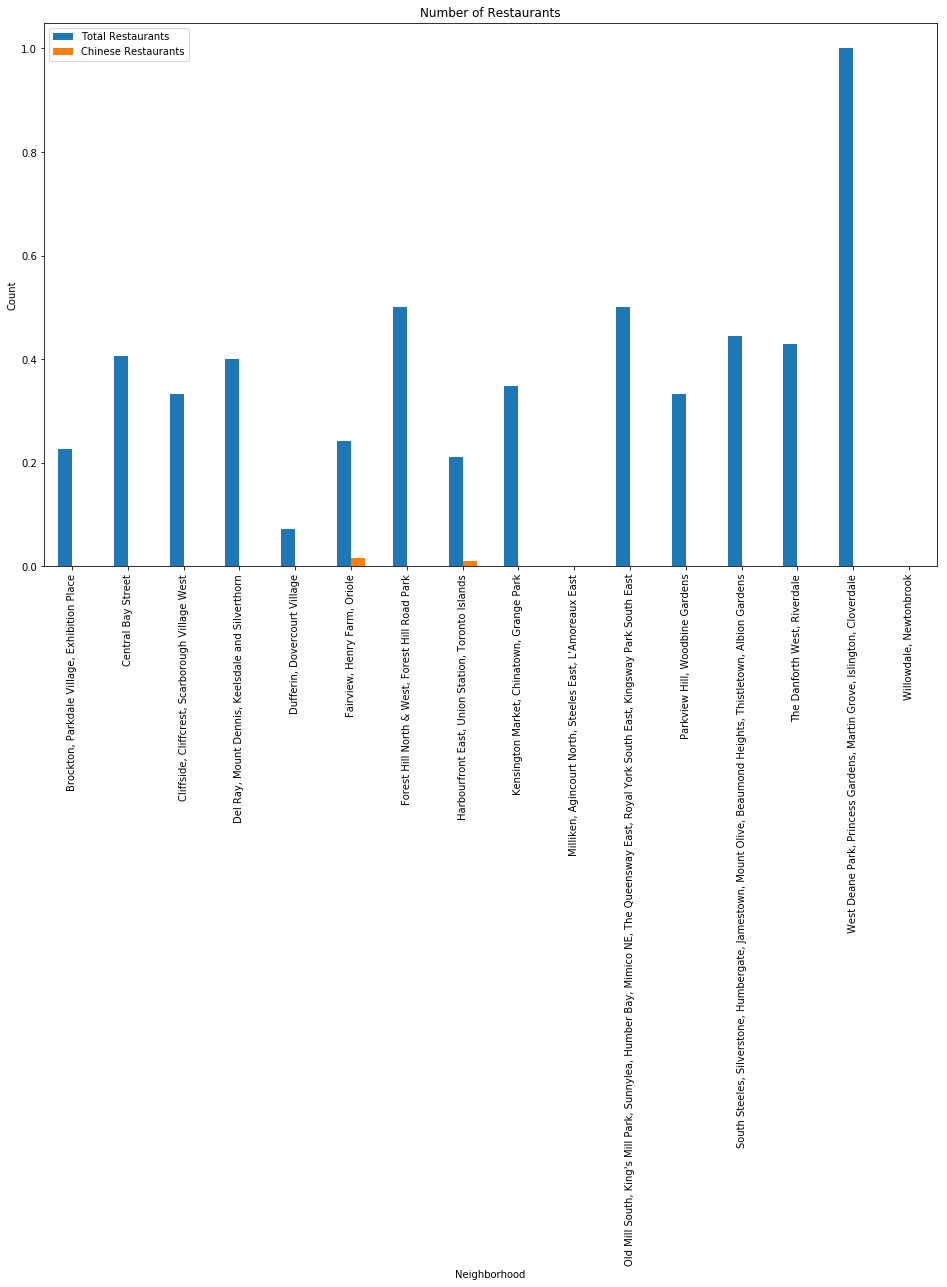

In [205]:
%matplotlib inline
ax = cluster_2.plot(x='Neighborhood',y=['Total Restaurants','Chinese Restaurants'],kind='bar',alpha=1,title='Number of Restaurants',figsize=(16, 10))
ax.set_ylabel('Count')

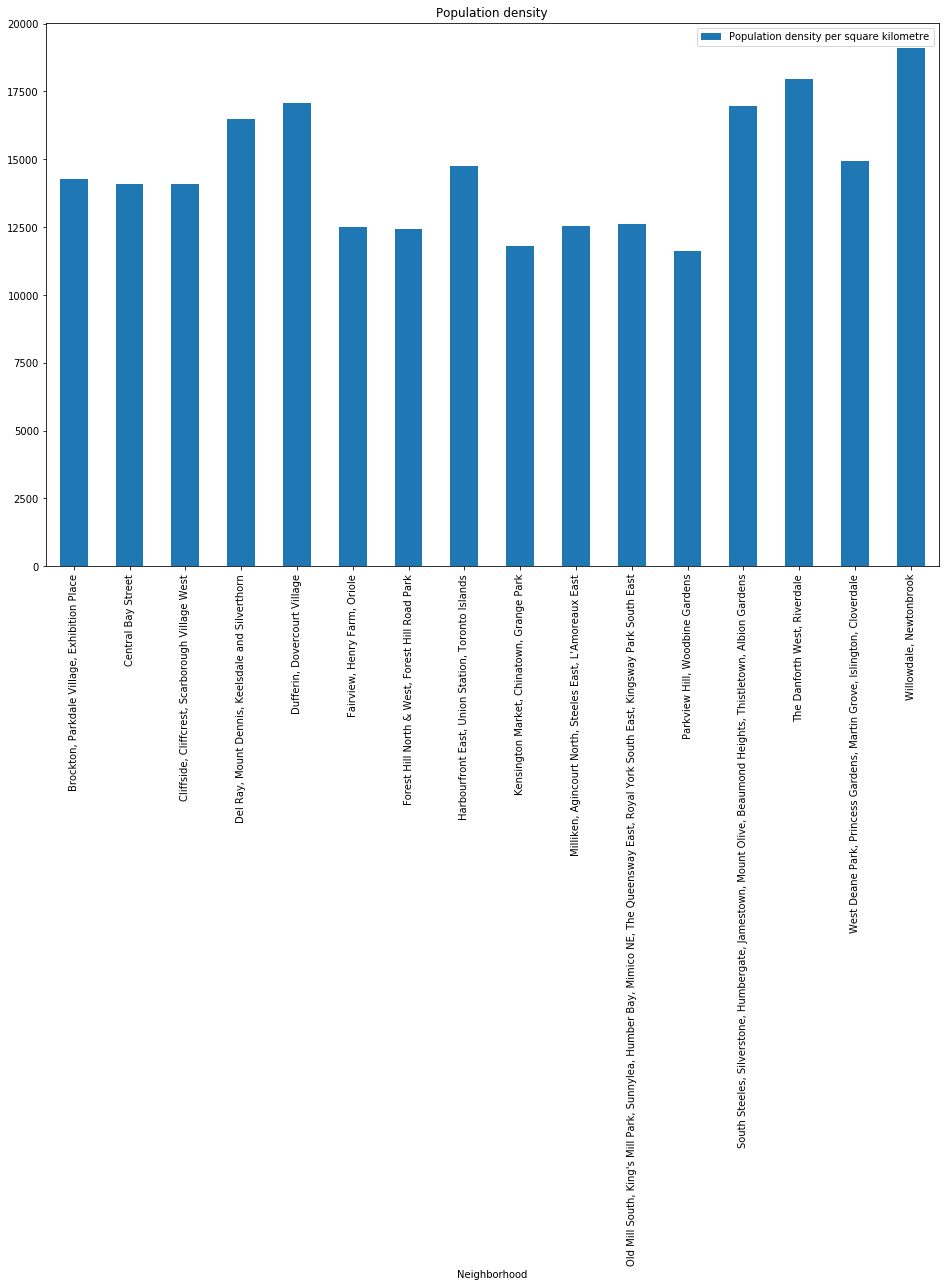

In [206]:
ax = cluster_2.plot(x='Neighborhood',y=['Population density per square kilometre'],kind='bar',alpha=1,title='Population density',figsize=(16, 10))

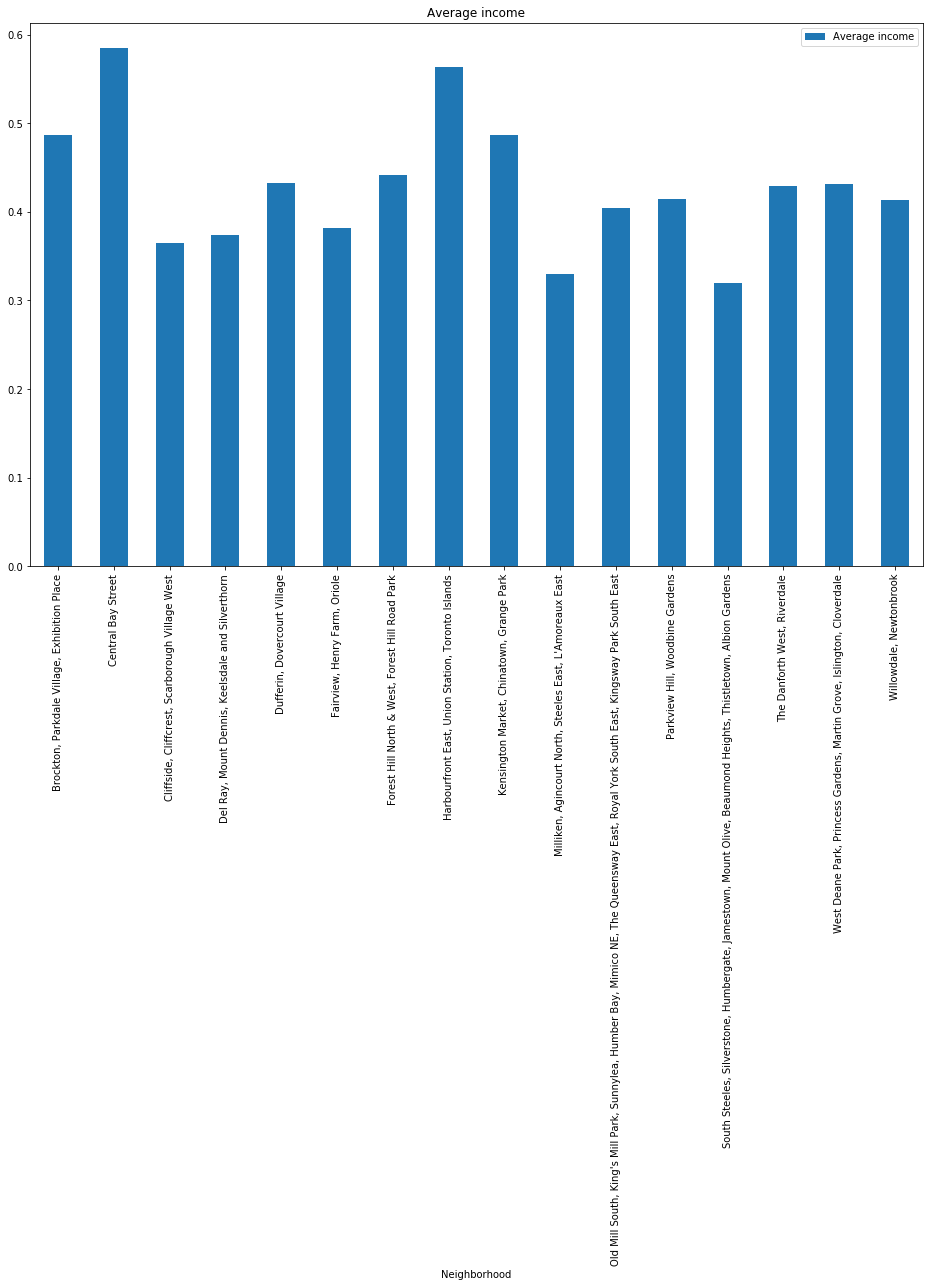

In [207]:
ax = cluster_2.plot(x='Neighborhood',y=['Average income'],kind='bar',alpha=1,title='Average income',figsize=(16, 10))

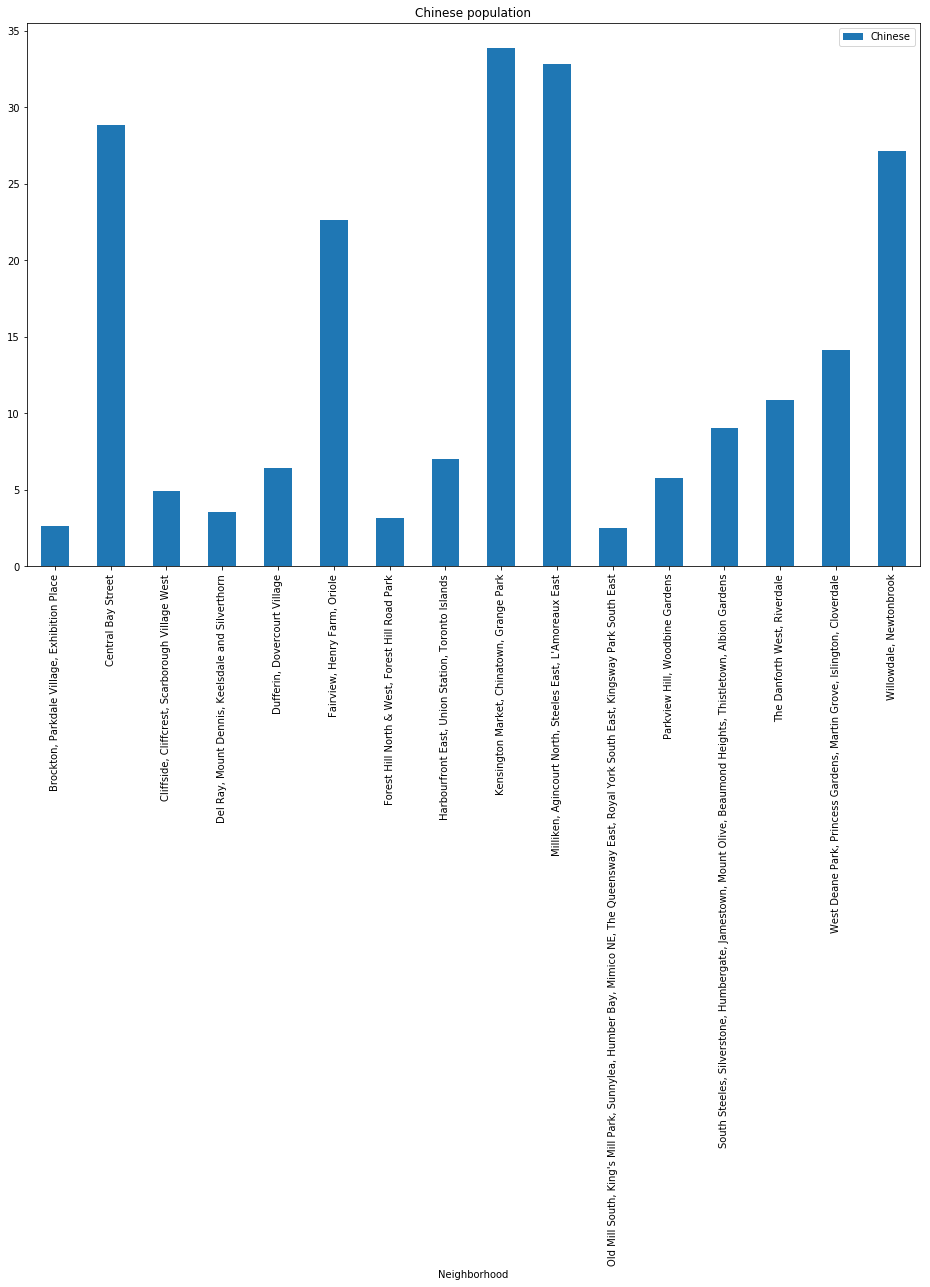

In [208]:
ax = cluster_2.plot(x='Neighborhood',y=['Chinese'],kind='bar',alpha=1,title='Chinese population',figsize=(16, 10))

It can be noted from the four bar graphs above that the five neighborhoods in Cluster 2 have exceptionally high percentage of Chinese population: 1) Central Bay Street; 2) Milliken, Agincourt North, Steeles East, L'Amoreaux East; 3) Willowdale, Newtonbrook; 4) Fairview, Henry Farm, Oriole; 5) Kensington Market, Chinatown, Grange Park. 

Of these five locations, an amount of Chinese restaurants exists in the "Fairview, Henry Farm, Oriole" postal code, and the average income in 'Milliken, Agincourt North, Steeles East, L'Amoreaux East' postal code is not as high as those in the same cluster. Thus, three of the most ideal location for opening a new Chinese restaurant are 1) Central Bay Street; 2) Willowdale, Newtonbrook; 3) Kensington Market, Chinatown, Grange Park. 


## Conclusion <a name="conclusion"></a>

In this research, we presented a way of determining the optimal location of opening a Chinese restaurants in the city of Toronto based on K-means clustering. Based on results and discussions, we conclude that the three of the most ideal location for opening a new Chinese restaurant are 1) Central Bay Street; 2) Willowdale, Newtonbrook; 3) Kensington Market, Chinatown, Grange Park. By sharing our results, we hope to provide references to new Chinese immigrants to Canada when they endeavor to secure their source of living in a new country. We also hope to inspire similar research for wiser choice of investments.


## References <a name="References"></a>

[1]"Focus on Geography Series, 2016 Census: Toronto, City (CSD) - Ontario: Immigration and Ethnocultural diversity". Statistics Canada. Retrieved October 31, 2017.

[2]"National Household Survey (NHS) Profile, 2011". 2.statcan.gc.ca. Retrieved April 18, 2014.

[3]"Toronto in Transition: Demographic Change in the Late Twentieth Century Archived March 10, 2012, at the Wayback Machine". (PDF). CERIS – The Ontario Metropolis Centre.